In [266]:
# gradient decsennt

In [267]:
from sklearn.datasets import make_regression
import numpy as np

In [268]:
x,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)


In [269]:
import matplotlib.pyplot as plt

In [270]:
plt.scatter(x,y)

In [271]:
# simply apply OLS

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
reg = LinearRegression()

In [274]:
reg.fit(x,y)

LinearRegression()

In [275]:
reg.coef_

array([78.35063668])

In [276]:
reg.intercept_

26.15963284313262

In [277]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x), color = "red")

In [278]:
# lets apply gradient decent assuming slope is constant m = 78.35
# but let us assume the starting value for intercept b =0
y_pred = ((78.35* x)+0).reshape(4) # calculating y value to plot the wrong vlues

In [279]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color = "red", label = "OLS" )
plt.plot(x,y_pred,color='#00a65a',label='b = 100')
plt.legend()
plt.show()

In [280]:
m = 78.35
b = 100  # at b = 0
 
# calculating the slope 
loss_slope = -2 * np.sum(y - 78.35*x.ravel() - b)
loss_slope

590.7223659179078

In [281]:
# calculating the learning rate  at 0.1
lr = 0.1
step_size = loss_slope*lr   
step_size

59.072236591790784

In [282]:
# claculating the new intercept 
b = b - step_size
b

40.927763408209216

In [283]:
y_pred1 = ((78.35* x)+0).reshape(4)

In [284]:

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred1,color='green',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()
     


In [285]:
# iteration two 

In [286]:
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope
     

118.14447318358157

In [287]:
step_size = loss_slope*lr
step_size
     

11.814447318358157

In [288]:
b = b - step_size
b

29.11331608985106

In [289]:
y_pred2 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='green',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [290]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope
     

23.62889463671634

In [291]:
step_size = loss_slope*lr
step_size

2.362889463671634

In [292]:
b = b - step_size
b

26.750426626179426

In [293]:

y_pred3 = ((78.35 * x) + b).reshape(4)


plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='green',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [294]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2*np.sum(y - m*x.ravel( ) - b)

  b = b - (lr * loss_slope)

  y_pred = m * x + b

  plt.plot(x,y_pred)

plt.scatter(x,y)
     

In [295]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [296]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1,n_targets=1,noise=20,random_state=13)
plt.scatter(x,y)

In [297]:
from sklearn.linear_model import LinearRegression

In [298]:
lr = LinearRegression()

In [299]:
lr.fit(x,y)

LinearRegression()

In [300]:
print(lr.coef_)

[27.82809103]


In [301]:
lr.intercept_

-2.29474455867698

In [302]:
np.mean(cross_val_score(reg , x,y,scoring= "r2", cv=10))

0.6375011587464419

In [303]:
import numpy as np

class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*x - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*x - self.b)*x)
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,x):
        return self.m * x + self.b



In [304]:
gd = GDRegressor(0.01, 100)



In [305]:
gd.fit(x,y)


-1.975138606834846e+232 -5.098360969408553e+232


In [306]:
gd.predict(x)

array([[-3.69129067e+232],
       [-4.23493771e+232],
       [-4.20213712e+232],
       [-6.98033350e+232],
       [-5.56816317e+232],
       [-6.79937280e+232],
       [-4.61775790e+232],
       [-5.46365486e+232],
       [-3.67428668e+232],
       [-4.24925465e+232],
       [-9.07870142e+232],
       [-5.88296765e+232],
       [-5.50879488e+232],
       [-4.63928766e+232],
       [-3.58021607e+232],
       [-5.99341204e+232],
       [-6.36222051e+232],
       [-5.80848709e+232],
       [-1.90829888e+232],
       [-8.55335596e+232],
       [-3.53999829e+232],
       [-4.08715895e+232],
       [-3.26477022e+232],
       [-9.34566539e+232],
       [-4.68881658e+232],
       [-1.86092429e+232],
       [-4.42954298e+232],
       [-4.46212210e+232],
       [-4.14758570e+232],
       [-4.06503913e+232],
       [-6.52434203e+232],
       [-6.61114145e+232],
       [-5.99404888e+232],
       [-2.60651436e+232],
       [-7.78505156e+231],
       [-2.75699451e+232],
       [-5.52785814e+232],
 

In [307]:
# visualisation for understanding 

In [308]:
from sklearn.datasets import make_regression

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [309]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [310]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [311]:
b = -150
m = 27.82
lr = 0.001
all_b = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope = 0
    cost = 0
    for j in range(X.shape[0]):
        slope = slope - 2*(y[j] - (m * X[j]) -  b)
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope)
    all_b.append(b)
    all_cost.append(cost)
    y_pred = m * X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)

In [312]:
all_b = np.array(all_b).ravel()
all_b

array([-120.4588544 ,  -96.82593791,  -77.91960473,  -62.79453818,
        -50.69448494,  -41.01444235,  -33.27040827,  -27.07518102,
        -22.11899921,  -18.15405376,  -14.98209741,  -12.44453232,
        -10.41448025,   -8.7904386 ,   -7.49120528,   -6.45181862,
         -5.62030929,   -4.95510183,   -4.42293586,   -3.99720308,
         -3.65661686,   -3.38414789,   -3.16617271,   -2.99179256,
         -2.85228845,   -2.74068515,   -2.65140252,   -2.57997641,
         -2.52283553,   -2.47712282])

In [313]:
all_cost = np.array(all_cost).ravel()
all_cost


array([2210040.49020261, 1424629.13499295,  921965.86765877,
        600261.37656489,  394370.50226481,  262600.34271276,
        178267.44059944,  124294.38324692,   89751.62654131,
         67644.26224972,   53495.5491031 ,   44440.37268926,
         38645.05978441,   34936.0595253 ,   32562.29935947,
         31043.09285334,   30070.80068942,   29448.5337045 ,
         29050.28283416,   28795.40227714,   28632.27872065,
         28527.87964449,   28461.06423575,   28418.30237416,
         28390.93478274,   28373.41952423,   28362.20975879,
         28355.0355089 ,   28350.44398898,   28347.50541622])

<IPython.core.display.Javascript object>


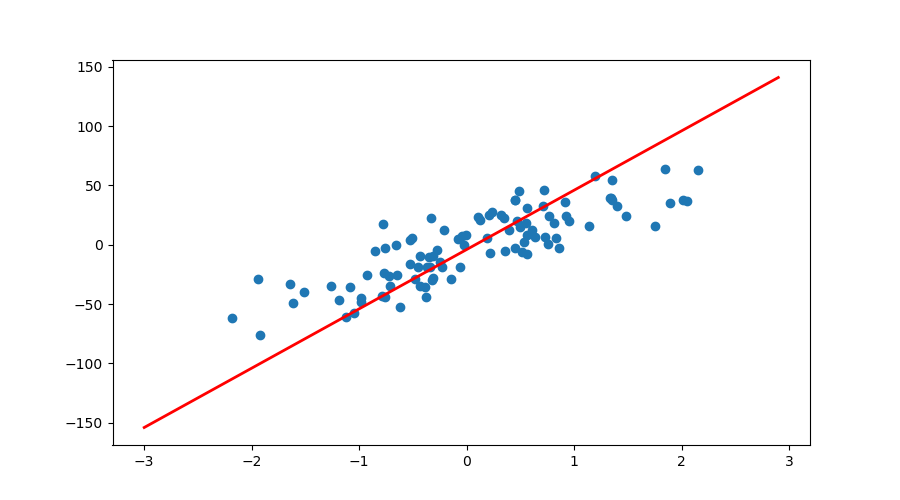

In [314]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)


<IPython.core.display.Javascript object>


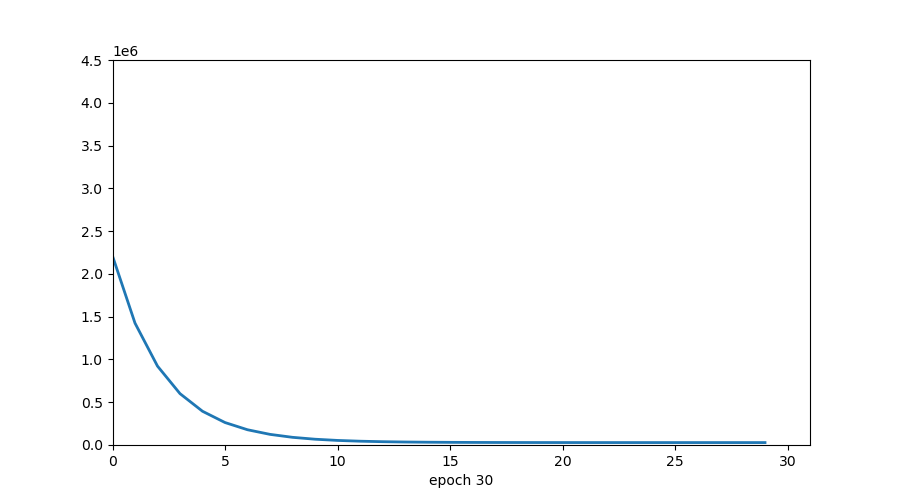

C:\anaconda\lib\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [315]:
# Cost function
# creating a blank window 
# for the animation 
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 4500000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation5.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>


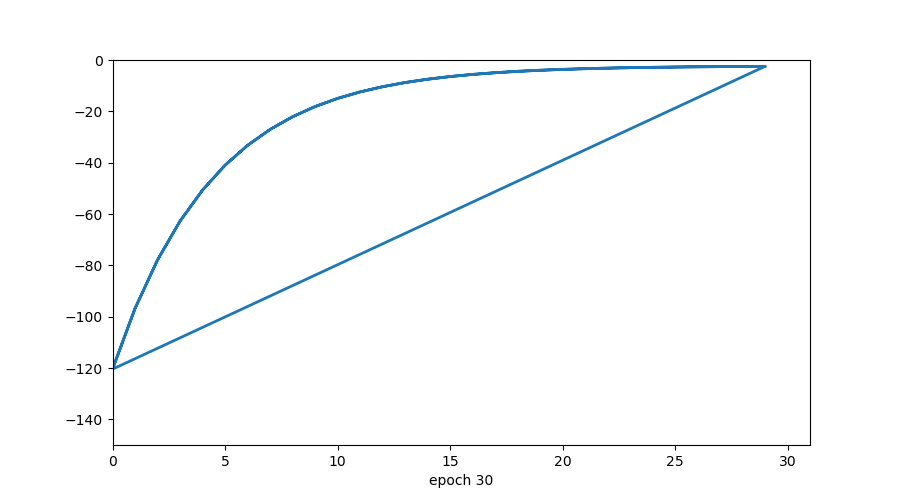

In [316]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation




fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-150, 0)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
    
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation2.gif" 
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)


<IPython.core.display.Javascript object>


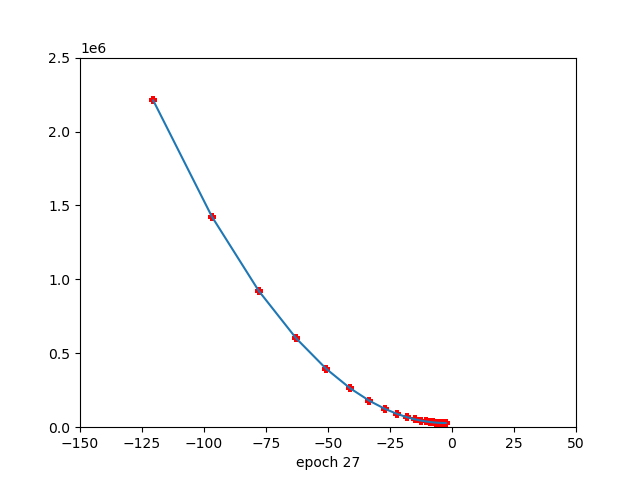

In [317]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
sc = ax.scatter(x,y,color='red',marker='+')
plt.xlim(-150,50)
plt.ylim(0,2500000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=30, interval=500, repeat=True) 
plt.show()

f = r"animation3.gif" 
writergif = animation.PillowWriter(fps=2) 
ani.save(f, writer=writergif)

In [318]:
b_input = np.linspace(-150,150,100)

In [319]:
cost_input = []

for i in range(len(b_input)):
    this_cost = 0 
    for j in range(X.shape[0]):
        this_cost = this_cost + (y[j] - m*X[j] - b_input[i])**2
    #cost_input.append(this_cost)
    print(this_cost)
        

IndexError: list index out of range

In [ ]:
# now we will visualise both b and m while changing 

In [ ]:
#  1 effect of learning rate in gradient descent univse
#  2 the univsality of gradient descent 
